# Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.kde import KDEUnivariate

# Galton

## Load Data

In [2]:
df = pd.read_csv("GaltonsHeightData.csv")

In [3]:
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


The statistic unit here is one child. The data is in long format. 

In [4]:
df.describe()

,Family,Father,Mother,Height,Kids
count,898.000000,898.000000,898.000000,898.000000,898.000000
mean,105.216036,69.232851,64.084410,66.760690,6.135857
std,57.189899,2.470256,2.307025,3.582918,2.685156
min,1.000000,62.000000,58.000000,56.000000,1.000000
25%,58.000000,68.000000,63.000000,64.000000,4.000000
50%,105.000000,69.000000,64.000000,66.500000,6.000000
75%,155.750000,71.000000,65.500000,69.700000,8.000000
max,205.000000,78.500000,70.500000,79.000000,15.000000


In [5]:
cols = ['Height', 'Father', 'Mother']
df[cols] = round(df[cols] * 2.54)

In [6]:
df

,Family,Father,Mother,Gender,Height,Kids
0,1,199.0,170.0,M,186.0,4
1,1,199.0,170.0,F,176.0,4
2,1,199.0,170.0,F,175.0,4
3,1,199.0,170.0,F,175.0,4
4,2,192.0,169.0,M,187.0,4
...,...,...,...,...,...,...
893,205,174.0,165.0,M,174.0,8
894,205,174.0,165.0,M,172.0,8
895,205,174.0,165.0,F,163.0,8
896,205,174.0,165.0,F,161.0,8


## Missing values

In [7]:
df.isnull().sum().sum()

np.int64(0)

## Density

In [8]:
Father = df["Father"]
Mother = df["Mother"]

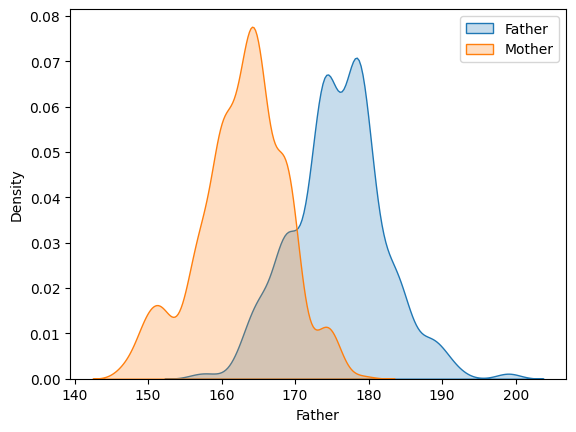

In [9]:
plt.figure()
sns.kdeplot(Father, fill=True, label = "Father")
sns.kdeplot(Mother, fill = True, label = "Mother")
plt.legend()
plt.show()

## Scatter Plot

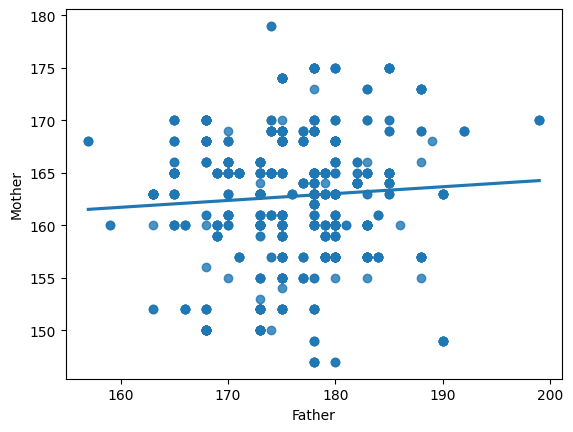

In [10]:
plt.figure()
sns.regplot(data = df, x = "Father", y = "Mother", ci = None)
plt.show()

## Number of children by familly

In [11]:
df_group = df.groupby('Family')['Family'].count()
#df_group = df_group.sort_values(ascending=False)
print(df_group)

Family
1      4
2      4
3      2
4      5
5      6
      ..
200    1
201    2
203    3
204    2
205    8
Name: Family, Length: 197, dtype: int64


In [12]:
df_group[4]

np.int64(5)

<Axes: xlabel='Family', ylabel='Count'>

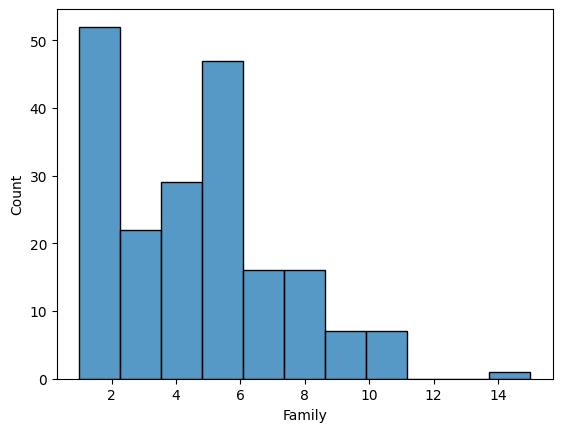

In [13]:
plt.figure()
sns.histplot(df_group)

## Create variable : MidParents

In [14]:
df["MidParents"] = (df["Father"] + 1.08 * df["Mother"]) / 2

In [15]:
df

,Family,Father,Mother,Gender,Height,Kids,MidParents
0,1,199.0,170.0,M,186.0,4,191.30
1,1,199.0,170.0,F,176.0,4,191.30
2,1,199.0,170.0,F,175.0,4,191.30
3,1,199.0,170.0,F,175.0,4,191.30
4,2,192.0,169.0,M,187.0,4,187.26
...,...,...,...,...,...,...,...
893,205,174.0,165.0,M,174.0,8,176.10
894,205,174.0,165.0,M,172.0,8,176.10
895,205,174.0,165.0,F,163.0,8,176.10
896,205,174.0,165.0,F,161.0,8,176.10


## Estimate regression

In [34]:
X = df[["MidParents"]]
Y = df[["Height"]]
reg = LinearRegression().fit(X, Y)

In [35]:
print(reg.score(X, Y))
print(reg.coef_)
print(reg.intercept_)
Y_pred = reg.predict(X)
print(Y_pred[:5])

0.10223850416211366
[[0.63309377]]
[58.25591659]
[[179.36675415]
 [179.36675415]
 [179.36675415]
 [179.36675415]
 [176.80905533]]


In [36]:
print(X,Y)

     MidParents
0        191.30
1        191.30
2        191.30
3        191.30
4        187.26
..          ...
893      176.10
894      176.10
895      176.10
896      176.10
897      176.10

[898 rows x 1 columns]      Height
0     186.0
1     176.0
2     175.0
3     175.0
4     187.0
..      ...
893   174.0
894   172.0
895   163.0
896   161.0
897   160.0

[898 rows x 1 columns]


In [37]:
# Verify formula
X = df["MidParents"]
Y = df["Height"]
np.cov(X,Y)

array([[21.16476803, 13.39928271],
       [13.39928271, 82.9726768 ]])

In [38]:
np.cov(X,Y).ndim

2

In [39]:
cov_X_Y = np.cov(X,Y)[0,1]
var_X = np.var(X)

In [40]:
Teta_1_chapeau = cov_X_Y / var_X
print(Teta_1_chapeau, reg.coef_)
print(np.isclose(Teta_1_chapeau, reg.coef_))

0.6337995568152224 [[0.63309377]]
[[False]]


In [41]:
Teta_0_chapeau = np.mean(Y) - Teta_1_chapeau * np.mean(X)
print(Teta_0_chapeau, reg.intercept_)
print(np.isclose(Teta_0_chapeau, reg.intercept_))

58.13182417043754 [58.25591659]
[False]


In [42]:
X = df[["MidParents"]]
Y = df[["Height"]]
reg = LinearRegression().fit(X, Y)

We can see that the resultats are proch but not enough close. It is due to the method of calcul

## Analyzing prediction 

In [43]:
# 2 dimension to 1 dimension numpy
Y_pred = Y_pred.flatten()

In [44]:
Y_pred = pd.Series(Y_pred)
Y_pred.name = "Height"
Y_pred = Y_pred.to_frame()

In [45]:
Y_pred, Y

(         Height
 0    179.366754
 1    179.366754
 2    179.366754
 3    179.366754
 4    176.809055
 ..          ...
 893  169.743729
 894  169.743729
 895  169.743729
 896  169.743729
 897  169.743729
 
 [898 rows x 1 columns],
      Height
 0     186.0
 1     176.0
 2     175.0
 3     175.0
 4     187.0
 ..      ...
 893   174.0
 894   172.0
 895   163.0
 896   161.0
 897   160.0
 
 [898 rows x 1 columns])

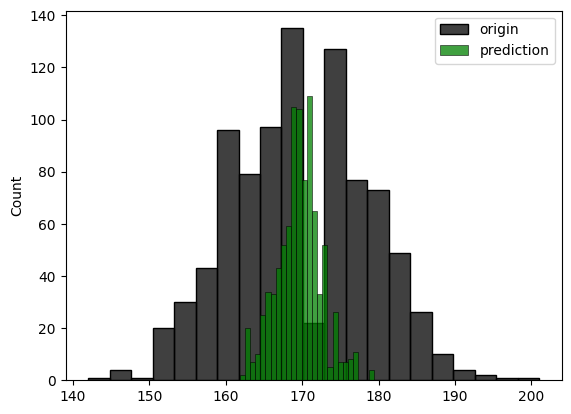

In [46]:
plt.figure()
sns.histplot(Y["Height"].values, label="origin", color="black")
sns.histplot(Y_pred["Height"].values, label="prediction", color="green")
plt.legend()
plt.show()

In [47]:
df["Height_pred"] = Y_pred

In [48]:
df_male = df[df["Gender"] == 'M'].copy()
df_female = df[df["Gender"] == 'F'].copy()

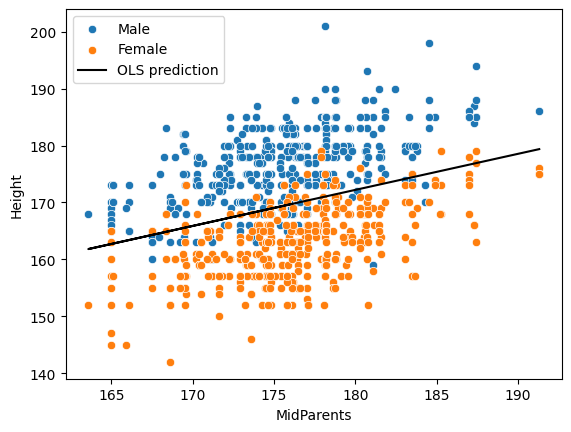

In [49]:
plt.figure()
sns.scatterplot(df_male, x = "MidParents" , y = "Height", label = "Male")
sns.scatterplot(df_female, x = "MidParents" , y = "Height", label = "Female")
plt.plot(X, Y_pred, label = 'OLS prediction', c = 'k')
plt.legend()

# Estimateur de la densité des résidus

In [71]:
male = df["Gender"] == "M"
female = df["Gender"] == "F"

In [72]:
nb_f = len(df_female)
nb_m = len(df_male)
alpha_f = nb_f / (nb_f + nb_m)
alpha_m = nb_m / (nb_f + nb_m)
residual = Y - Y_pred

In [73]:
residual_male = df["Height"] - df["Height_pred"]
residual_female = df["Height"] - df["Height_pred"]

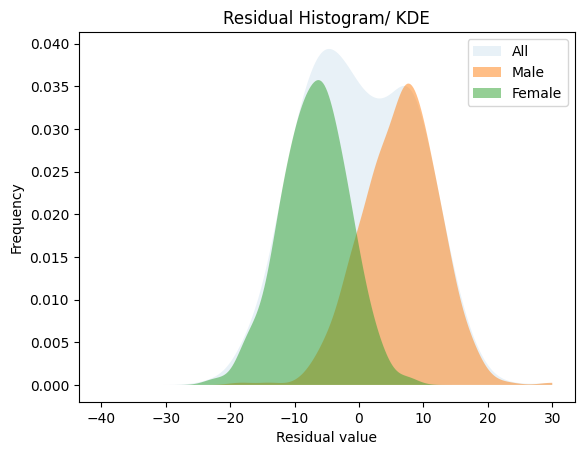

In [79]:
plt.figure()

x_grid = np.linspace(-40, 30, num = 300)
plt.title('Residual Histogram/ KDE')
plt.xlabel('Residual value')
plt.ylabel('Frequency')

kde_residual = KDEUnivariate(residual)
kde_residual.fit(kernel = 'gau')
pdf_est_residual = kde_residual.evaluate(x_grid)
plt.plot()
plt.fill_between(x_grid, pdf_est_residual, alpha = 0.1, label = 'All')

kde_residual_m = KDEUnivariate(residual[male])
kde_residual_m.fit(kernel = 'gau')
pdf_est_residual_m = kde_residual_m.evaluate(x_grid)
plt.fill_between(x_grid, alpha_m * pdf_est_residual_m, alpha = 0.5, label = 'Male')

kde_residual_f = KDEUnivariate(residual[female])
kde_residual_f.fit(kernel = 'gau')
pdf_est_residual_f = kde_residual_f.evaluate(x_grid)
plt.fill_between(x_grid, alpha_f * pdf_est_residual_f, alpha = 0.5, label = 'Female')

plt.legend()
plt.show()

We plotted the Probability Density Function (PDF) of the residuals for the entire dataset, as well as separately by gender. While the residuals appear to be approximately normally distributed within each gender group, the overall distribution of all residuals does not follow a normal pattern.

## 